In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('/home/jupyter-a.komova-13/STAT/hw_bootstrap.csv', sep=";", decimal = ',')

In [4]:
df

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control
...,...,...,...
995,996,1000.000000,Treatment
996,997,1200.000000,Treatment
997,998,1500.000000,Treatment
998,999,2000.000000,Treatment


In [5]:
df.dtypes

Unnamed: 0             int64
value                float64
experimentVariant     object
dtype: object

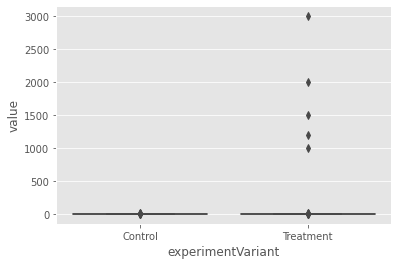

In [6]:
sns.boxplot(x='experimentVariant', y='value', data=df)

In [7]:
df.groupby('experimentVariant', as_index = False).agg({'value' : 'count'})

,experimentVariant,value
0,Control,500
1,Treatment,500


In [8]:
df.groupby('experimentVariant', as_index = False).agg({'value' : 'mean'})

,experimentVariant,value
0,Control,10.026867
1,Treatment,27.321499


In [9]:
df.groupby('experimentVariant', as_index = False).agg({'value' : 'median'})

,experimentVariant,value
0,Control,10.018465
1,Treatment,10.025847


In [10]:
control = df.query('experimentVariant == "Control"')

In [11]:
treatment = df.query('experimentVariant == "Treatment"')

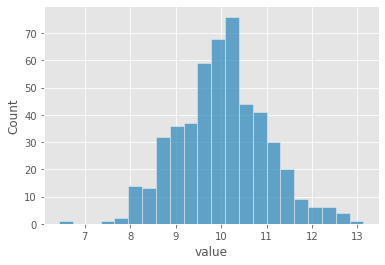

In [12]:
sns.histplot(control.value)

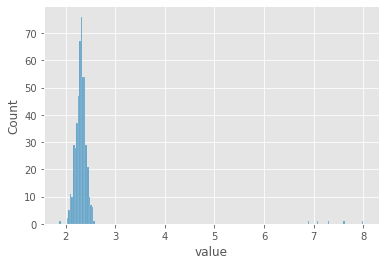

In [13]:
sns.histplot(np.log(treatment.value))

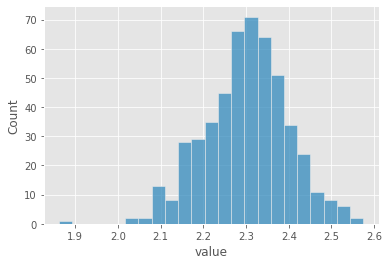

In [14]:
sns.histplot(np.log(control.value))

In [15]:
test1 = control['value']
test2 = treatment['value']

Задача
1. Сравните результат между тестом и контролем по двум кейсам:

Примените бутстрап (с np.mean) и критерий mann-whitney, а потом сравните p-value
Примените бутстрап (с np.median) и критерий mann-whitney, а потом сравните p-value.

# U-test

In [16]:
mannwhitneyu(test1, test2)

MannwhitneyuResult(statistic=124189.5, pvalue=0.42960742912427896)

In [17]:
ttest_ind(test1, test2)

Ttest_indResult(statistic=-2.0729020485356604, pvalue=0.038437593613498765)

# Bootstrap (mean)

In [18]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    test1, # числовые значения первой выборки
    test2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(test1), len(test2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = test1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = test2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

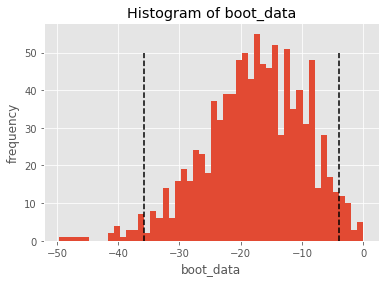

In [19]:
booted_data = get_bootstrap(test1, test2, boot_it = 1000) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [20]:
booted_data["p_value"]

0.03190494783697554

In [21]:
booted_data["ci"]

,0
0.025,-35.740913
0.975,-3.891451


# Bootstrap (median)

In [22]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    test1, # числовые значения первой выборки
    test2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(test1), len(test2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = test1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = test2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

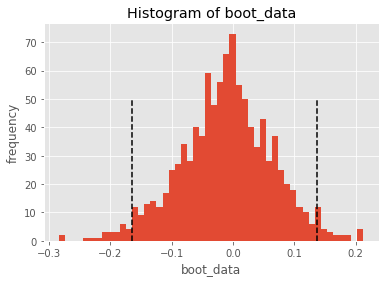

In [23]:
booted_data = get_bootstrap(test1, test2, boot_it = 1000) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [24]:
booted_data["p_value"]

0.8832235353827127

In [26]:
booted_data["ci"]

,0
0.025,-0.164180
0.975,0.137024


# Выводы

In [ ]:
# У рассматриваемых данных почти одинаковые медианные значения, а средние различаются практически в 3 раза. 
# Похоже, что такие результаты объясняются выбросами в группе Treatment

In [28]:
df.groupby('experimentVariant', as_index = False).agg({'value' : 'mean'})

,experimentVariant,value
0,Control,10.026867
1,Treatment,27.321499


In [29]:
df.groupby('experimentVariant', as_index = False).agg({'value' : 'median'})

,experimentVariant,value
0,Control,10.018465
1,Treatment,10.025847


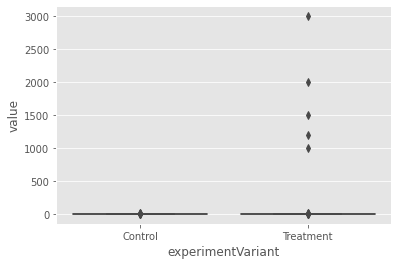

In [30]:
sns.boxplot(x='experimentVariant', y='value', data=df)

In [ ]:
#Результат U-теста (расчет в ячейке 16)

#MannwhitneyuResult(statistic=124189.5, pvalue=0.42960742912427896)

#Вероятность получить такие или еще более выраженные различия составляет 43%, 
#нулевая гипотеза не может быть отклонена на этом основании, 
#т.е. по данным этого теста мы не можем говорить о значимом различии параметра value в этих группах.

In [ ]:
#Результат bootstrap (np.mean). 
#Расчеты в ячейках 18-21.

#Получен p-value = 0.03190494783697554
#и интервал 
#0.025	-35.740913
#0.975	-3.891451

#p-value = 0.03 позволяет отклонить нулевую гипотезу (при условии, что мы пользуемся p-value=0.05 как "граничным"),
#т.е. выборки статистически значимо отличаются на основании этого критерия.

#кроме того, в полученный доверительный интервал не входит 0, что также позволяет отклонить нулевую гипотезу.

In [ ]:
#Результат bootstrap (np.median). 
#Расчеты в ячейках 22-26.

#Получен p-value = 0.8832235353827127
#и интервал 
#0.025	-0.164180
#0.975	0.137024

#p-value = 0.88 не позволяет отклонить нулевую гипотезу,
#т.е. по данным этого теста мы не можем говорить о значимом различии параметра value в этих группах.

#кроме того, в полученный доверительный интервал входит 0, что также не позволяет отклонить нулевую гипотезу.

In [ ]:
#Итог:

#Значимые различия параметра value в выборках получается выявить при использовании средних значений в bootstrap.
#В наборе Treatment есть выбросы высоких значений, они влияют и на обычное среднее в выборке.

#При использовании медианных значений bootstrap не показывает статистически значимых различий выборок. 
#Выборки практически не отличаются и просто по медианным значениям.

#U-test также не позволил выявить значимые различия в выборках.
#полученный p-value ниже, чем при bootstrap(median), и выше, чем при bootstrap(mean, 
#возможно, из-за того, что он менее чувствителен к выбросам, как в выборке Treatment.